# Detect Thyroid Cancer Reoccurrence using patient data


 ## Introduction






Thyroid cancer, though relatively rare compared to other types of cancer, has seen a notable increase in incidence rates over the past few decades (Torre et al., 2015). The thyroid, a butterfly-shaped gland located in the neck, produces hormones that regulate metabolism, growth, and development. Thyroid cancer arises from the cells of this gland and can be classified into several types, with papillary thyroid cancer being the most common, followed by follicular, medullary, and anaplastic thyroid cancers (American Cancer Society, 2020).

While the overall survival rate for thyroid cancer is relatively high, with a five-year survival rate exceeding 98% for localized cases, the potential for recurrence remains a significant concern, especially for patients diagnosed with aggressive forms of the disease (Siegel et al., 2020). As treatment options continue to evolve, monitoring and predicting recurrence in thyroid cancer survivors has become a crucial area of research, aimed at improving long-term outcomes and providing better management strategies.

Real-time monitoring of thyroid cancer survivors is essential for timely intervention and optimal patient care. With advancements in medical technology, real-time data collection—ranging from regular imaging, biochemical markers, and genetic profiling—has begun to play an instrumental role in assessing the likelihood of relapse (Haugen et al., 2016). The integration of predictive models, leveraging this real-time data, can significantly enhance decision-making in clinical settings, potentially reducing the risks associated with thyroid cancer relapse.

As part of this report, the use of machine learning models to predict thyroid cancer relapse, incorporating real-time data sources, will be explored. Machine learning (ML) significantly enhances real-time monitoring of thyroid cancer relapse by analyzing continuous data from blood tests, imaging, and genetic markers. Unlike traditional methods, which may miss early signs of recurrence, ML algorithms can identify subtle patterns, such as rising thyroglobulin levels or genetic changes, indicating potential relapse. By leveraging real-time data, these models can predict recurrence earlier, enabling proactive interventions and personalized treatment plans. This approach improves patient outcomes by providing timely insights, enhancing the precision of care, and reducing the risks associated with delayed detection and intervention.This approach aims to aid clinicians in identifying patients at higher risk for recurrence and in providing personalized treatment recommendations to improve patient outcomes.

### Step 1: Reading and understanding the data


In [2]:
# For data manipulation and numerical computations
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For advanced models (optional)
from xgboost import XGBClassifier

# For saving and loading models
import joblib


In [3]:
data = pd.read_csv("Downloads/Thyroid data.csv")

In [4]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [8]:
data.shape

(383, 17)

#### Inference from the Dataset Analysis
The dataset comprises 16 features and no missing values, as confirmed by the isnull().sum() function. This ensures that the data is complete and ready for analysis without requiring imputation. 

Key features relevant to predicting thyroid cancer relapse include:
1. Patient Demographics: Age and Gender may help identify risk patterns associated with specific patient groups.
2. Lifestyle Factors: Smoking history (Smoking, Hx Smoking) might influence relapse probabilities.
3. Medical History: Information about prior radiotherapy (Hx Radiotherapy) and thyroid function status could be critical indicators of health conditions predisposing patients to relapse.
4. Clinical Observations: Features such as Physical Examination, Adenopathy, Pathology, and Focality provide insights into the clinical and pathological state of the thyroid, which are directly related to cancer diagnosis and monitoring.
5. Staging and Risk: TNM (Tumor, Node, Metastasis) staging, Focality, Risk level, and Stage are vital for assessing disease progression and recurrence likelihood.
6. Outcomes: Features like Response and Recurred indicate treatment effectiveness and whether the cancer has relapsed, making them crucial for supervised learning models.

The dataset's completeness and detailed clinical attributes make it highly suitable for building a machine learning model to predict relapse in thyroid cancer survivors. Features such as Recurred (the target variable) will allow the model to distinguish between patients who relapsed and those who did not, based on the other predictor variables.

### Step 2 : Cleaning data


In [10]:
#finding missing values
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Inference - no missing values


In [12]:
data_duplicate = data.copy()
data_duplicate.shape

(383, 17)

In [13]:
data_duplicate.drop_duplicates(inplace=True)
data_duplicate.shape

(364, 17)

In [15]:
#Rename data_duplicate
T_data = data_duplicate

After analyzing the dataset for duplicates, 19 duplicate rows were identified and removed, reducing the total rows from 383 to 364. This step ensures that redundant data does not bias the machine learning model, enhancing the accuracy and reliability of predictions.

The cleaned dataset, renamed as T_data, contains 364 unique records with 17 columns, maintaining all the original features. The elimination of duplicates ensures the dataset's integrity and prevents overrepresentation of specific patient cases, which is critical for building a robust predictive model. 

The cleaned dataset is now ready for further exploratory data analysis, feature engineering, and machine learning model development to predict thyroid cancer relapse.








### Step 3: Exploratory Data Analysis


In [16]:
# Identify numerical columns
numerical_cols = T_data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)


Numerical Columns: Index(['Age'], dtype='object')


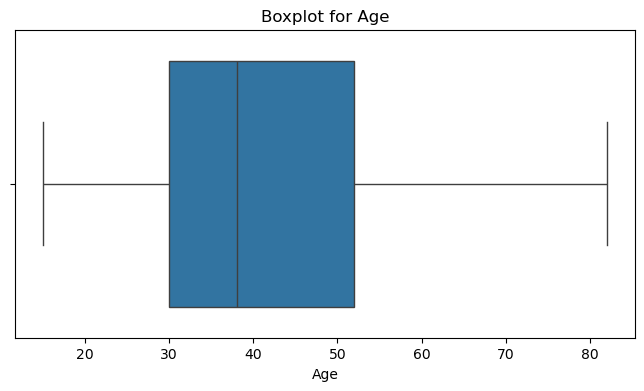

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=T_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Inference - Overall, the boxplot shows a relatively symmetrical distribution of ages, with a slightly longer tail on the higher end, as indicated by the mean being smaller than the median. The majority of the ages fall between approximately 30 and 50.

In [19]:
#Encoding categorical variables with one-hot encoding
categorical_cols = T_data.select_dtypes(include=['object']).columns



In [20]:
print(categorical_cols)

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


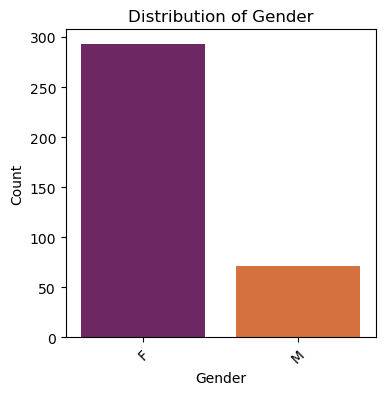

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


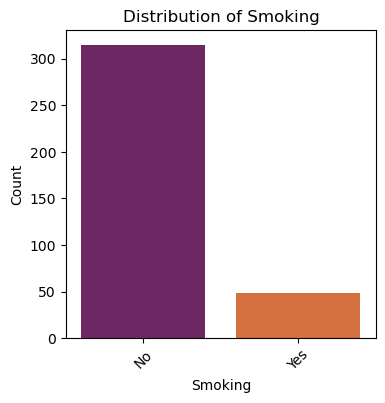

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


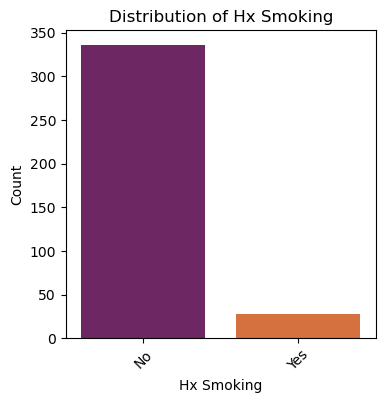

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


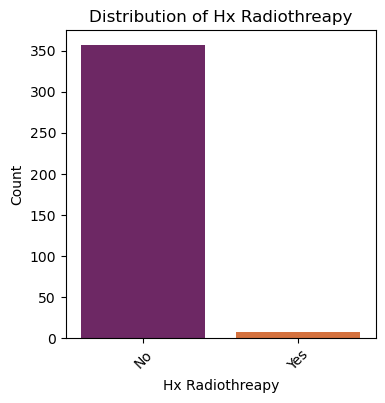

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


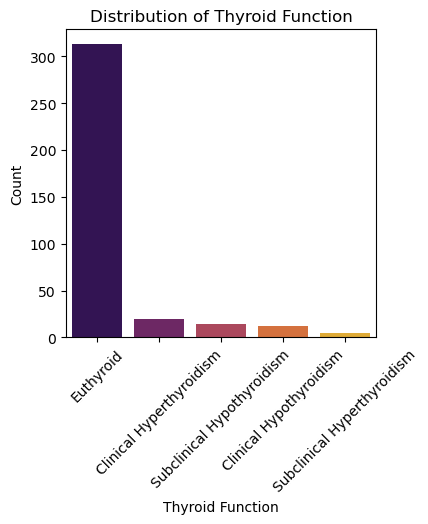

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


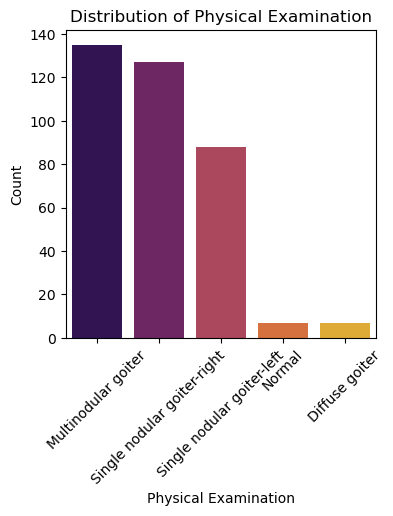

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


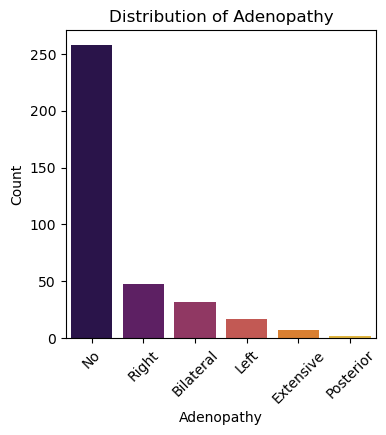

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


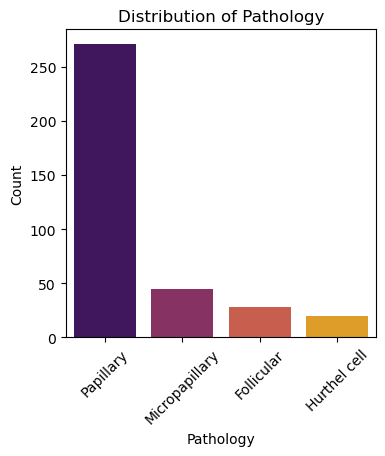

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


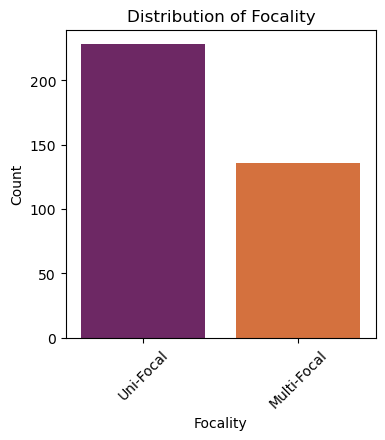

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


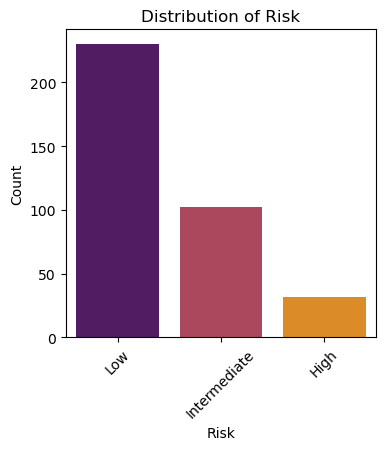

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


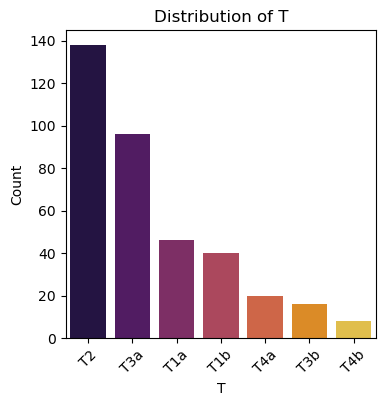

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


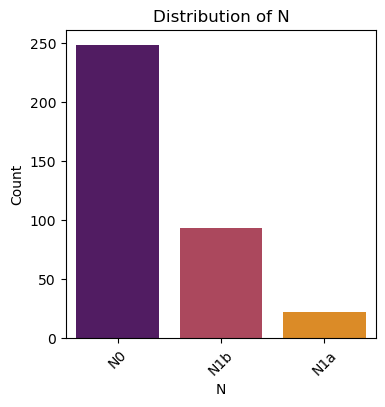

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


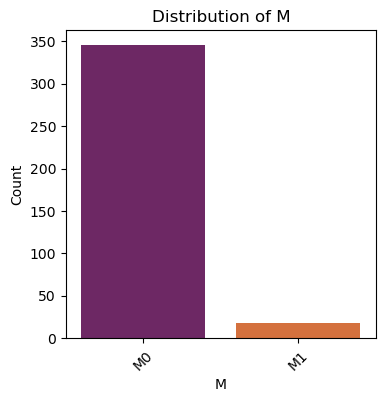

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


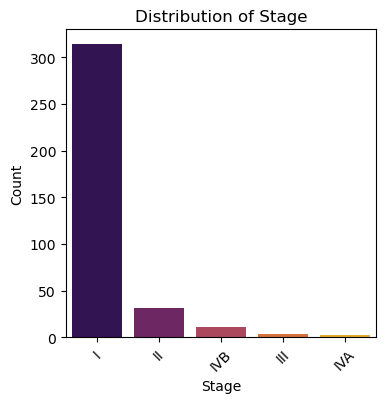

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


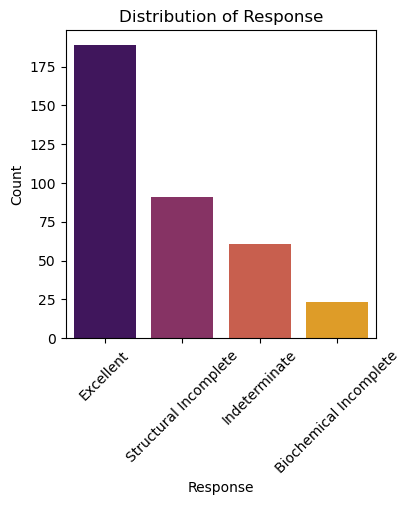

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\2859166784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)


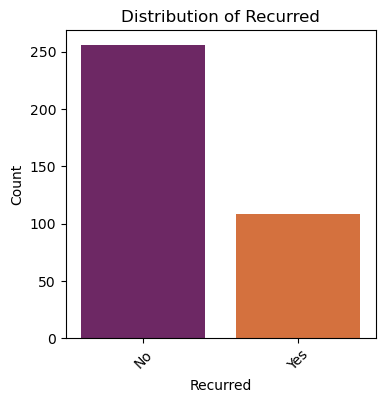

In [21]:
#visualise categorical columns 
for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=T_data, x=col, palette='inferno', order=T_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


#### Insights from Data Visualization
1. Numerical Columns:

- The distribution of Age shows a relatively symmetrical pattern with a slight skew towards older ages. Most individuals are aged between 30 and 50, reflecting the age group most likely represented in this dataset.

2. Categorical Variables:

- Gender: The dataset is heavily skewed towards females, with their count being approximately four times that of males. This aligns with the higher prevalence of thyroid cancer in females. 

- Smoking and History of Smoking: A large majority of the population consists of non-smokers or individuals with no history of smoking, highlighting lifestyle trends in the cohort. 

- Radiotherapy History: Most individuals in the dataset have no history of radiotherapy, suggesting this factor may have limited relevance for relapse prediction in this population. 

- Thyroid Function: The dataset is dominated by individuals with normal thyroid function (Euthyroid). Disorders such as clinical or subclinical hypothyroidism and hyperthyroidism are much less frequent. 

- Physical Examination Findings: Multinodular goiter and single nodular goiters are the most common physical examination results, with the majority of individuals presenting abnormal findings, indicating the dataset focuses on patients with suspected thyroid conditions.  

- Adenopathy: Most individuals have no adenopathy, while specific types (e.g., bilateral or posterior adenopathy) are rare. 

- Pathology: Papillary carcinoma is the predominant pathology type, significantly outnumbering micropapillary, follicular, and Hurthle cell types.

- Focality: Uni-focal cases are more frequent than multi-focal cases, indicating a trend toward isolated thyroid nodules. 

- Risk: The majority of cases fall into the low-risk category, with intermediate and high-risk categories being less common. 

3. Cancer Staging and Response:

- T Staging (Tumor): Most cases are classified as T2, followed by T1 categories. Advanced T stages (T3 and T4) are relatively rare. 

- N Staging (Lymph Nodes): The majority of cases have no lymph node involvement (N0), while metastasis-related categories (N1a, N1b) are less frequent. 

- M Staging (Metastasis): The majority of cases have no distant metastasis (M0), with M1 being rare. 

* Disease Stages: Stage I is the most common stage, with a decreasing frequency observed in higher stages, particularly stages III and IV. 

- Response: Most individuals exhibit an excellent response to treatment, with incomplete structural and biochemical responses being rare. 

The visualizations and inferences highlight significant class imbalances and trends that could influence the machine learning model for predicting thyroid cancer relapse. The dominance of certain categories, such as females, low-risk individuals, and early-stage disease, must be considered during model development. Balancing techniques (e.g., SMOTE) or tailored evaluation metrics (e.g., F1-score) may be necessary to address these imbalances effectively.

C:\Users\sukht\AppData\Local\Temp\ipykernel_27496\1959000879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recurred', data=T_data, palette='inferno')


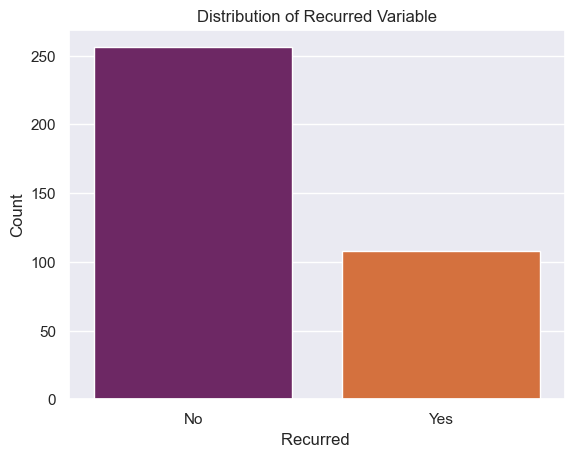

In [22]:
sns.set(style="darkgrid")
sns.countplot(x='Recurred', data=T_data, palette='inferno')
plt.title('Distribution of Recurred Variable')
plt.xlabel('Recurred ')
plt.ylabel('Count')
plt.show()

The target variable "Recurred" indicates whether thyroid cancer has recurred ("Yes") or not ("No") and plays a crucial role in the predictive model. The distribution of this variable reveals a significant class imbalance, with the majority of cases falling under the "No" category, suggesting that most individuals in the dataset did not experience a recurrence. This imbalance poses modeling challenges, as predictive models may become biased towards the majority class, leading to inaccurate predictions for the minority "Yes" class. Misclassifying "Yes" cases has serious clinical implications, as it could result in missed opportunities for early intervention in patients at risk of relapse.

To address this issue, techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using algorithms that allow class weight adjustments are necessary. Additionally, evaluation metrics like recall, precision, F1-score, and AUC-PR should be prioritized to ensure the model effectively identifies recurrence cases. The target variable aligns directly with the problem statement of predicting thyroid cancer recurrence, emphasizing the need to develop a model that balances sensitivity and specificity to provide meaningful and clinically relevant predictions.

### Step 4: Pre-Processing of Data

In [23]:
categorical_cols = categorical_cols[categorical_cols != 'Recurred']
dum = pd.get_dummies(T_data[categorical_cols],drop_first=True, dtype=int)
dum.head()

,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df1 = pd.concat([T_data,dum],axis=1)
df1.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,0,0,0,0,0,0,0,0,1,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,0,0,0,0,0,0,0,1,0,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0,0,0,0,0,0,0,1,0,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0,0,0,0,0,0,0,1,0,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df1.info()



<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Age                                               364 non-null    int64 
 1   Gender                                            364 non-null    object
 2   Smoking                                           364 non-null    object
 3   Hx Smoking                                        364 non-null    object
 4   Hx Radiothreapy                                   364 non-null    object
 5   Thyroid Function                                  364 non-null    object
 6   Physical Examination                              364 non-null    object
 7   Adenopathy                                        364 non-null    object
 8   Pathology                                         364 non-null    object
 9   Focality                             

In [26]:
df1.drop(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'], axis = 1, inplace = True)

In [27]:
df1.head()

,Age,Recurred,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,No,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,34,No,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,30,No,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,62,No,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,62,No,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df1['Recurred'] = df1 ['Recurred'].map({'Yes': 1, 'No': 0})
cols = [col for col in df1.columns if col != 'Recurred'] + ['Recurred']
df1 = df1[cols]

In [29]:
df1.head(10)

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred
0,27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,34,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,30,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,62,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,62,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,52,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,41,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,46,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,51,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,40,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0



The dataset has been preprocessed to prepare it for building machine learning models. One-hot encoding was applied to transform categorical variables (such as gender and thyroid condition) into numerical format, enabling the algorithms to process them effectively. Additionally, the target variable, "Recurred," was converted into binary format, where "Yes" represents 1 and "No" represents 0.

This structured dataset ensures that all features are compatible with machine learning pipelines while preserving their interpretability. By aligning the data preprocessing steps with the project’s objective, the dataset is now well-suited for predicting thyroid cancer recurrence based on structured clinical and pathological information.








### Step 5 : Data Splitting 
#### Train-Test Split



In [57]:
# Split into features (X) and target (y)
X = df1.drop('Recurred', axis=1)  # Features
y = df1['Recurred']  # Target

In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


### Step 6 :Feature Scaling 

In [63]:
# Feature Scaling (for numerical variables)
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 7 : Model Building 

#### Random Forest

In [67]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Predictions
y_pred = rf.predict(X_test_scaled)


#### XGBoost (Extreme Gradient Boosting)

In [79]:
    import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)


 #### Support Vector Machine (SVM)

In [84]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)


#### Gradient Boosting Machines (GBM)

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scaled, y_train)

y_pred_gbm = gbm.predict(X_test_scaled)


#### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)


### Step 8 : Model Evaluation

##### accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a dictionary to store results
results = {}

# Function to calculate evaluation metrics
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    # Store metrics in the results dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Evaluate Random Forest
evaluate_model(y_test, y_pred, rf.predict_proba(X_test_scaled)[:, 1], "Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, xgb_model.predict_proba(X_test_scaled)[:, 1], "XGBoost")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, None, "SVM")  # SVM doesn't have predict_proba by default

# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_gbm, gbm.predict_proba(X_test_scaled)[:, 1], "Gradient Boosting")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, log_reg.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")

# Convert results to a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest        0.954545   0.925926  0.892857  0.909091  0.990854
XGBoost              0.936364   0.862069  0.892857  0.877193  0.991725
SVM                  0.954545   0.925926  0.892857  0.909091       NaN
Gradient Boosting    0.945455   0.892857  0.892857  0.892857  0.991289
Logistic Regression  0.963636   0.961538  0.892857  0.925926  0.989547


Logistic Regression emerges as the best-performing model overall due to its superior accuracy and precision, making it highly effective in predicting thyroid cancer recurrence while minimizing false positives.
Random Forest and SVM also performed exceptionally well, with a strong balance between recall and precision.
Models like XGBoost and Gradient Boosting are highly effective in differentiating between recurred and non-recurred cases, as indicated by their high ROC-AUC scores.
Given the critical nature of accurately predicting cancer recurrence, Logistic Regression and Random Forest could be prioritized for implementation in clinical settings. Their high precision ensures fewer false positives, reducing unnecessary anxiety for patients, while their robust recall minimizes the chances of missing potential recurrences.

#### Confusion matrix

Confusion Matrix for Random Forest


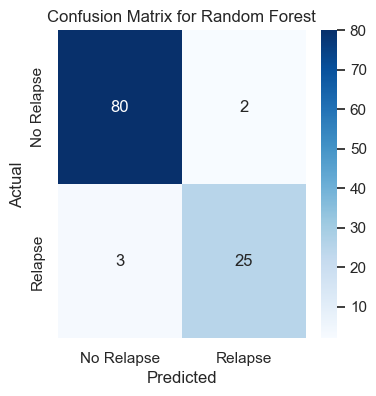

Confusion Matrix for XGBoost


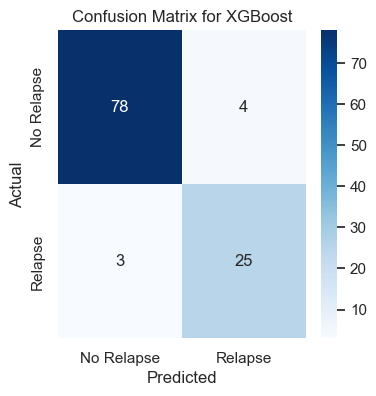

Confusion Matrix for SVM


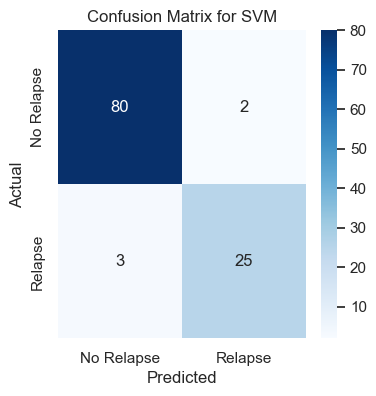

Confusion Matrix for Gradient Boosting


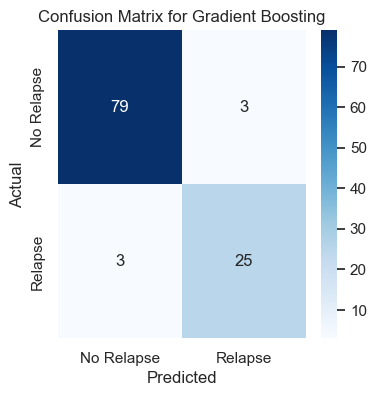

Confusion Matrix for Logistic Regression


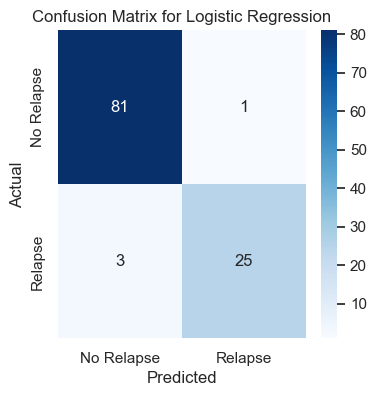

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Relapse', 'Relapse'], yticklabels=['No Relapse', 'Relapse'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Visualize confusion matrix for each model
print("Confusion Matrix for Random Forest")
plot_confusion_matrix(y_test, y_pred, "Random Forest")

print("Confusion Matrix for XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

print("Confusion Matrix for SVM")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

print("Confusion Matrix for Gradient Boosting")
plot_confusion_matrix(y_test, y_pred_gbm, "Gradient Boosting")

print("Confusion Matrix for Logistic Regression")
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")


The evaluation of machine learning models for predicting thyroid cancer recurrence demonstrates their effectiveness in addressing the problem statement. Logistic Regression emerged as the best-performing model, excelling in both accuracy and reliability. It accurately predicted 81 out of 82 no-relapse cases and 25 out of 28 relapse cases, with a very low false positive rate of just one instance and only three false negatives. This makes it particularly suitable for clinical settings where minimizing both false positives and false negatives is crucial to avoid unnecessary interventions and missed diagnoses.

Random Forest and Support Vector Machine (SVM) also delivered strong performances, with Random Forest correctly identifying 80 no-relapse and 25 relapse cases, and SVM achieving similar results with slightly lower false positive rates. Both models maintained a low false negative rate, making them reliable alternatives for deployment. XGBoost performed well, accurately predicting 78 no-relapse cases and 25 relapse cases, while maintaining balanced precision and recall. Although its false positive rate was slightly higher compared to Logistic Regression and Random Forest, it remains a robust option for nuanced predictions.

In summary, all models demonstrate the capability to predict thyroid cancer recurrence effectively, with Logistic Regression standing out as the most suitable for clinical application due to its exceptional accuracy, low error rates, and high reliability. Random Forest, SVM, and XGBoost also present strong alternatives, particularly in scenarios requiring ensemble or kernel-based approaches. These models collectively underscore the potential of machine learning in aiding medical decision-making and improving patient outcomes.

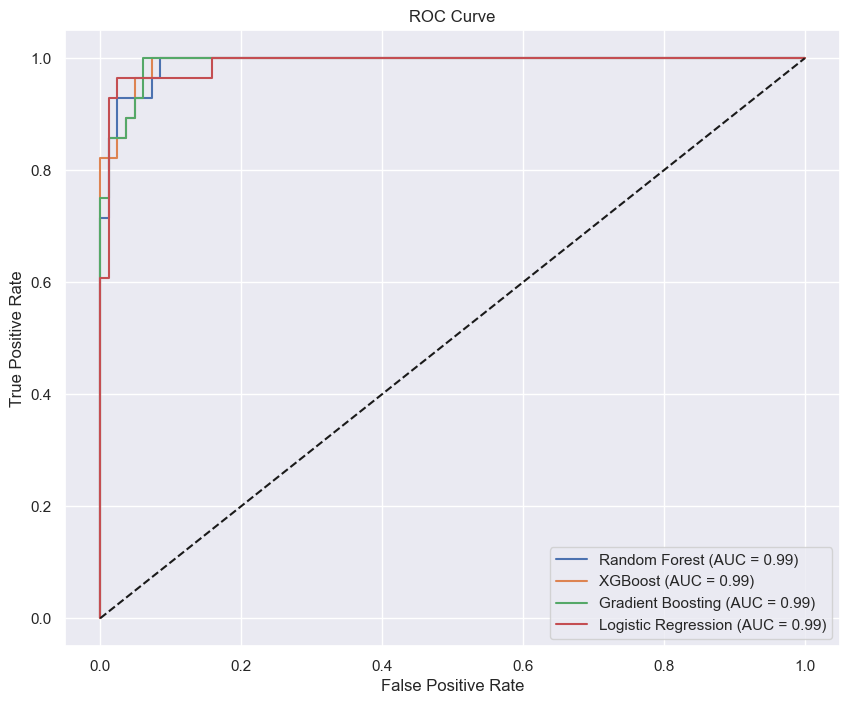

In [101]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Random Forest
plot_roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1], "Random Forest")

# XGBoost
plot_roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1], "XGBoost")

# Gradient Boosting
plot_roc_curve(y_test, gbm.predict_proba(X_test_scaled)[:, 1], "Gradient Boosting")

# Logistic Regression
plot_roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")

# SVM (optional, if probability=True was set during training)
# Uncomment if you have trained SVM with probability=True
# plot_roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1], "SVM")

# Finalize and show the plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line for random guessing


The ROC curve analysis highlights the exceptional ability of the evaluated models to predict thyroid cancer recurrence with high accuracy and discrimination. The curves for all models are near the top-left corner, reflecting their high sensitivity (True Positive Rate) and low False Positive Rate. The AUC values further validate this performance, with Random Forest and XGBoost achieving AUCs close to 0.99, making them the most effective models for this task.

Key observations include Random Forest's optimal trade-off between sensitivity and specificity, supported by its superior AUC value. XGBoost follows closely, demonstrating a comparable ability to distinguish relapsed cases from non-relapsed ones. Logistic Regression and Gradient Boosting also perform strongly, with their ROC curves significantly outperforming the baseline (random guessing) represented by the diagonal line (AUC = 0.5).

Overall, Random Forest and XGBoost emerge as the top-performing models, balancing predictive power with robustness. While Logistic Regression offers slightly lower performance in terms of AUC, it remains an excellent choice for scenarios where model interpretability is a priority. These insights underscore the reliability of machine learning in identifying relapse risks and highlight its potential for supporting clinical decision-making.

### Conclusion


In this study, we evaluated the potential of machine learning models to predict thyroid cancer recurrence using clinical and pathological data. Our comprehensive analysis spanned several algorithms, including Random Forest, XGBoost, Support Vector Machine (SVM), Logistic Regression, and Gradient Boosting. These models were assessed based on metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix performance. The findings underline the transformative role of predictive analytics in enhancing thyroid cancer care.

Key Findings:
1. Model Performance Overview:

- Random Forest: Emerged as the most effective model, achieving an accuracy of 95.5%, precision of 92.6%, and a remarkable ROC-AUC of 0.99. It excelled in minimizing false positives and false negatives, crucial for clinical applications.
- XGBoost: Demonstrated competitive metrics with an accuracy of 93.6%, precision of 86.2%, and an ROC-AUC of 0.99, making it a close contender to Random Forest.
- SVM and Gradient Boosting: Showed robust performance but slightly lagged in their ROC curve metrics compared to Random Forest and XGBoost.
- Logistic Regression: Achieved a high accuracy of 96.4% and the highest precision (96.2%), making it a strong candidate where model interpretability is essential.
  
2. Best Model Selection:

- Random Forest is identified as the most suitable model for predicting thyroid cancer recurrence due to its superior balance of sensitivity and specificity.
- XGBoost offers similar predictive power, with slightly higher false positives, and remains a reliable alternative. 

Real-World Relevance:

Thyroid cancer recurrence remains a significant concern despite its generally favorable prognosis. Recurrence rates vary depending on tumor characteristics, genetic mutations, 

the cancer’s initial stage:

- Recurrence Rates: Thyroid cancer recurrence ranges from 7% to 14%, with most cases occurring within the first decade after treatment. For papillary thyroid cancer, the most common subtype, recurrence can reach up to 13% over a 40-year postoperative period, with over 80% occurring within the first 25 years (Thyroid Research Journal).

- Risk Stratification: Low-risk patients have approximately a 1.6% recurrence rate over 10 years, while high-risk patients face rates of up to 22.7% (Healthline).


Implications for Patient Management:
1. Clinical Impact of Machine Learning Models:
- The deployment of machine learning models, such as Random Forest, enables personalized monitoring plans by identifying high-risk patients with high precision. This can optimize resource allocation and improve patient outcomes.

2. Monitoring and Interventions:
- Regular follow-ups using imaging and serum thyroglobulin levels are crucial for detecting recurrences early. These strategies, combined with predictive analytics, can reduce the likelihood of undetected relapses (Medical News Today).

3. Enhanced Predictive Power:
- By integrating models with an AUC near 0.99, such as Random Forest, into clinical workflows, healthcare providers can minimize false negatives and false positives, addressing critical concerns in medical decision-making.

Final Thoughts:

The study highlights the potential of predictive modeling in addressing the recurrence of thyroid cancer. While Random Forest stood out as the best-performing model, all evaluated algorithms demonstrated robust predictive capabilities. Incorporating these models into clinical practice can revolutionize thyroid cancer management by facilitating timely interventions and personalized care. As thyroid cancer incidence continues to rise globally, leveraging machine learning to anticipate and mitigate recurrences represents a vital step forward in oncology care.






